## Simple plot of GPS locations for each line

Plot all the GPS locations that are in the header for each spectrum within a square. Lines are plotted as different colours, starting with red, then orange, yellow, etc.

Axes are in relative metres, with North pointing up.

GPS locations are probably inaccurate and not necessarily an accurate reflection of the positions at which the spectra were recorded.

This gives a rough indication of how reliable are the GPS locations in the header.

# input: latlon.txt

The latlon.txt file is produced in the following way:

grep -a GPS-L /g/data/u46/users/aw3463/GuyByrne/30APR18/lake_george/26_march_2018/line*/*asd.rad.txt | sed -e 's/\/g\/data\/u46\/users\/aw3463\/GuyByrne\/30APR18\/lake_george\/26_march_2018\/line//' -e 's/lkg_l[0-9]000//' -e 's/llg_l[0-9]000//' -e 's/.asd.rad.txt:GPS-//' -e 's/\//-/' -e 's/Longitude is E/ /' -e 's/Latitude is S/ /' > ll; vim -c ":g/./normal J" -c ":wq" ll; awk '{printf "%s %6.6f %6.6f\n", $1, (($4+14900)*60*30.87*cos(35*3.14159/180))+42000, (($2+3500)*60*30.87)+10000}' ll > latlon.txt ; rm -f ll

### Important: The above shell line must be copied from editing this cell, rather than the markdown interpretation!!


Note: Some of the numbers in the last part are specific to the Lake George data and will need to be changed for other datasets. This includes:
14900 - the longitude degrees\*100  
3500 - the latitude degrees\*100  
cos(35 - assumes latitude of 35 degrees  
42000 - subtract off extraneous metres from longitude arcminute calculation    
10000 - subtract off extraneous metres from latitude arcminute calculation  

Format: 

9-37 -128.42860 -255.81662  
9-38 -128.12515 -256.00184  
9-39 -127.97343 -256.00184  


Where first column (eg. 9-37) means the 9th line, 37th spectrum; 2nd column is the relative longitude; 3rd column is relative latitude (both in metres).

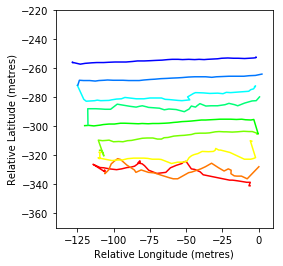

In [2]:
%matplotlib inline
import numpy
from matplotlib import pyplot as plt
data=numpy.genfromtxt('latlon.txt',delimiter=' ')
plt.plot(data[:37,1],data[:37,2], color='#FF0000')
plt.plot(data[38:71,1],data[38:71,2], color='#FF7700')
plt.plot(data[72:113,1],data[72:113,2], color='#FFFF00')
plt.plot(data[114:155,1],data[114:155,2], color='#77FF00')
plt.plot(data[156:193,1],data[156:193,2], color='#00FF00')
plt.plot(data[194:231,1],data[194:231,2], color='#00FF77')
plt.plot(data[232:271,1],data[232:271,2], color='#00FFFF')
plt.plot(data[272:309,1],data[272:309,2], color='#0077FF')
plt.plot(data[310:349,1],data[310:349,2], color='#0000FF')
axes = plt.gca()
axes.set_xlim([-140, 10])
axes.set_ylim([-370, -220])
plt.xlabel('Relative Longitude (metres)')
plt.ylabel('Relative Latitude (metres)')
axes.set_aspect('equal')

plt.savefig('GPS-Loc-Plot.png')